In [1]:
#非线性回归
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from torch.autograd import Variable
import torch

In [3]:
x_data=np.linspace(-2,2,200)[:,np.newaxis]
noise=np.random.normal(0,0.2,x_data.shape)
y_data=np.square(x_data)+noise

生成带噪音的二次函数    $y=x^2+noise$

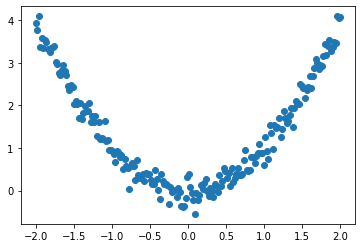

In [4]:
plt.scatter(x_data,y_data)
plt.show()

In [5]:
x_data=x_data.reshape(-1,1)#和[:,np.newaxis]作用一样
y_data=y_data.reshape(-1,1)

In [6]:
#把numpy数据类型转换成tensor数据类型
x_data=torch.FloatTensor(x_data)
y_data=torch.FloatTensor(y_data)
inputs=Variable(x_data)
target=Variable(y_data)

In [9]:
#构建神经网络
class NonlineraRegression(nn.Module):
    #定义网络结构,一般把网络中具有可学习参数的层放在__init__()中
    def __init__(self):
        #初始化nn.Module
        super(NonlineraRegression,self).__init__()
        #1-10-1     10是隐藏层,
        self.fc1=nn.Linear(1,10)
        self.tanh=nn.Tanh()
        self.fc2=nn.Linear(10,1)
    #定义网络计算
    def forward(self,x):#前向计算，一般不写反向传播的函数，pytorch可以自动计算
        x=self.fc1(x)
        x=self.tanh(x)
        x=self.fc2(x)
        return x

In [10]:
#定义实例模型
model=NonlineraRegression()
#定义代价函数
mse_loss=nn.MSELoss()
#定义优化器
optimizer=optim.SGD(model.parameters(),lr=0.3)#随机梯度下降法，lr是学习率

In [8]:
#查看模型参数
for name,paramenters in model.named_parameters():
    print('name:{},param:{}'.format(name,paramenters))

name:fc1.weight,param:Parameter containing:
tensor([[-0.9513],
        [ 0.4187],
        [-0.1576],
        [-0.8063],
        [ 0.5425],
        [ 0.6271],
        [ 0.9130],
        [ 0.5953],
        [ 0.3765],
        [ 0.8501]], requires_grad=True)
name:fc1.bias,param:Parameter containing:
tensor([-0.7238, -0.3434,  0.0526, -0.8609,  0.4772, -0.8288,  0.8790,  0.8015,
         0.8576, -0.2211], requires_grad=True)
name:fc2.weight,param:Parameter containing:
tensor([[-0.2924,  0.0331, -0.0936, -0.1138,  0.1424, -0.1591,  0.0633,  0.1174,
         -0.0067,  0.1651]], requires_grad=True)
name:fc2.bias,param:Parameter containing:
tensor([0.2961], requires_grad=True)


In [9]:
for i in range(2001):
    out=model(inputs)
    #计算loss
    loss=mse_loss(out,target)
    #梯度清零,否则梯度会累加
    optimizer.zero_grad()
    #计算梯度
    loss.backward()
    #修改权值
    optimizer.step()
    if i%200==0:
        print(i,loss.item())#训练1000次后，loss越来越小

0 2.5229222774505615
200 0.10776308923959732
400 0.11230464279651642
600 0.10306011140346527
800 0.071963369846344
1000 0.07132034003734589
1200 0.07063604146242142
1400 0.06922560930252075
1600 0.06809478998184204
1800 0.06722564995288849
2000 0.06650492548942566


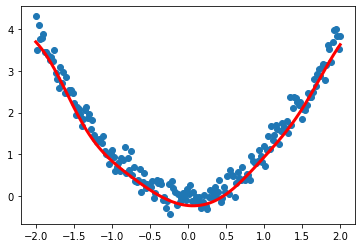

In [11]:
y_pred=model(inputs)
plt.scatter(x_data,y_data)
plt.plot(x_data,y_pred.data.numpy(),'r-',lw=3)
plt.show()

In [27]:
test=np.linspace(-1,1,200)[:,np.newaxis]
test=torch.tensor(test)
test_inputs=Variable(test)

In [26]:
y_pred=model(test_inputs)

RuntimeError: expected scalar type Float but found Double